In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

In [29]:
df = pd.read_csv('/home/abrar/Desktop/Code/Temporal HPC/hpc_simulator/multizone_scheduler/daily_costs.csv')

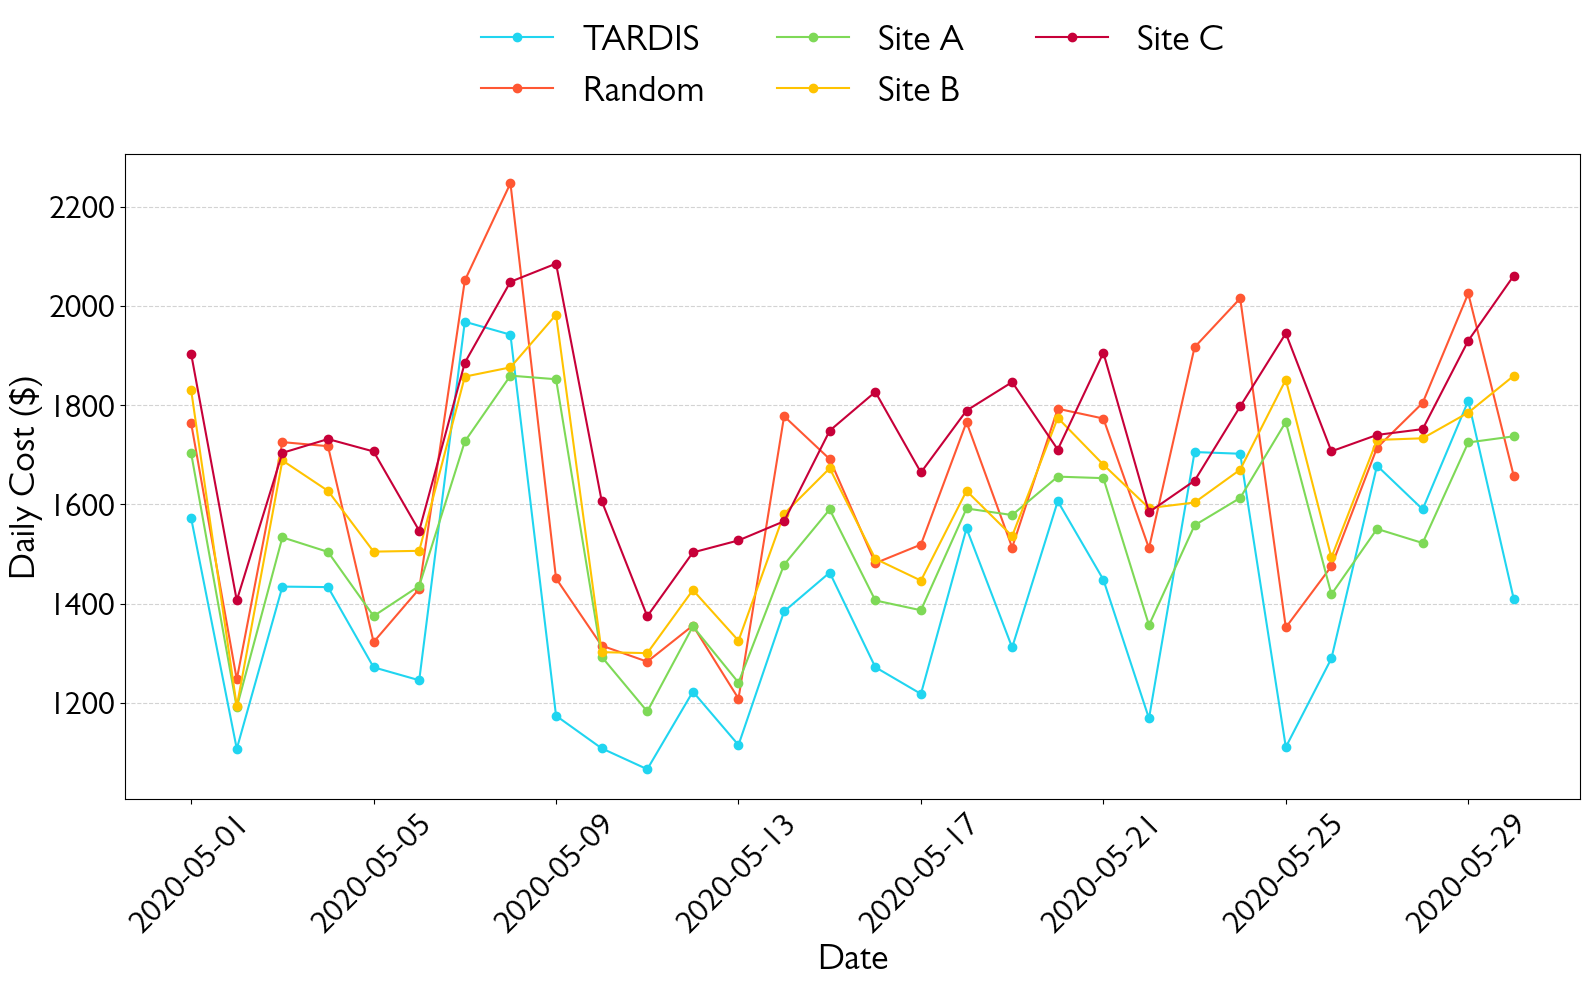

In [30]:
# Set the font to Gill Sans 
plt.rcParams['font.family'] = 'Gill Sans'

# Convert date column to datetime format for proper plotting
df['date'] = pd.to_datetime(df['date'])

# Define color palette for schedulers
colors = {
    'Multi Zone': '#20D5F0',
    'Random': '#FF5733',
    'US East': '#7ED957',
    'US West': '#FFC300',
    'US South': '#C70039'
}

# Define schedulers and their corresponding dataset columns
schedulers = {
    'Multi Zone': 'multi_zone_power_cost',
    'Random': 'random_power_cost',
    'US East': 'single_us_east_power_cost',
    'US West': 'single_us_west_power_cost',
    'US South': 'single_us_south_power_cost'
}

# Define the mapping for display labels (only affects the legend & plot labels)
display_labels = {
    'Multi Zone': 'TARDIS',
    'Random': 'Random',
    'US East': 'Site A',
    'US West': 'Site B',
    'US South': 'Site C'
}

# Define figure and axis for the plot
plt.figure(figsize=(16, 10))  # Adjusted figure dimensions

# Plot daily costs
lines = []  # Store line objects for custom legend ordering
for scheduler, cost_col in schedulers.items():
    line, = plt.plot(
        df['date'], df[cost_col], label=display_labels[scheduler],  # Use display labels for the legend
        color=colors.get(scheduler, 'gray'),
        marker='o', linewidth=1.5  # Thicker lines for better visibility
    )
    lines.append(line)

# Customize labels and ticks
plt.xlabel('Date', fontsize=26)
plt.ylabel('Daily Cost ($)', fontsize=26)
plt.tick_params(axis='both', which='major', labelsize=24)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add gridlines
plt.grid(which='both', axis='y', color='lightgrey', linestyle='dashed', zorder=0)

# Reorder the legend based on the defined order
ordered_lines = [lines[list(schedulers.keys()).index(scheduler)] for scheduler in schedulers.keys()]
ordered_labels = [display_labels[scheduler] for scheduler in schedulers.keys()]  # Use display labels

plt.legend(
    handles=ordered_lines,
    labels=ordered_labels,
    title_fontsize=26,
    fontsize=26,
    loc='lower center',
    bbox_to_anchor=(0.5, 1.02),  # Centered above the plot
    ncol=3,  # Arrange legend items in 3 columns
    frameon=False
)

# Tight layout and save
plt.tight_layout()
plt.savefig("daily_cost_trends.pdf", bbox_inches='tight')

# Show the plot
plt.show()


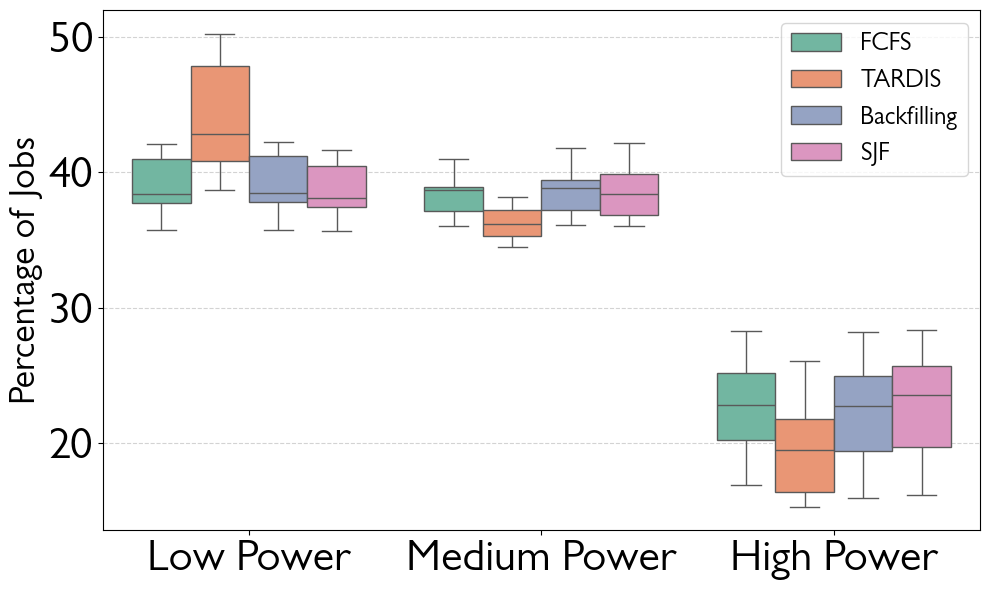

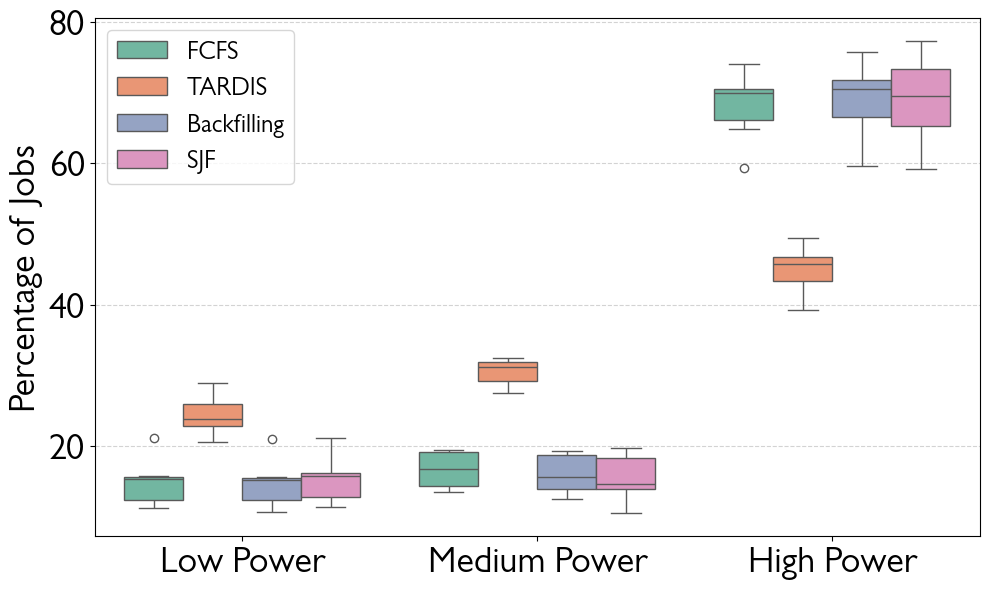

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
df = pd.read_csv('/home/abrar/Desktop/Code/Temporal HPC/hpc_simulator/monthly_results/temporal_analysis_summary.csv')

# Define the category order to ensure consistency across plots
category_order = ['low_power', 'medium_power', 'high_power']
category_labels = ['Low Power', 'Medium Power', 'High Power']

# Set the font and overall styling
plt.rcParams['font.family'] = 'Gill Sans'

# Define figure size
figsize = (10, 6)

# Define color palette for schedulers
scheduler_palette = "Set2"

# Filter data for Peak Hours
peak_data = df[df['Period'] == 'Peak']

# Plot Peak Hours Distribution with schedulers
plt.figure(figsize=figsize)
sns.boxplot(
    x=pd.Categorical(peak_data['Category'], categories=category_order, ordered=True), 
    y='Percentage', 
    hue='Scheduler',  
    data=peak_data, 
    palette=scheduler_palette
)
# plt.title("Peak Hours Distribution - Power Category", fontsize=16)
# plt.xlabel("Power Category", fontsize=26)
plt.xticks(ticks=range(len(category_order)), labels=category_labels, fontsize=26)
plt.ylabel("Percentage of Jobs", fontsize=26)
plt.tick_params(axis='both', which='major', labelsize=32)
plt.grid(which='both', axis='y', color='lightgrey', linestyle='dashed', zorder=0)
plt.legend(fontsize=18, title_fontsize=18, loc="upper right")

# Save the figure
plt.tight_layout()
plt.savefig("peak_hours_distribution.pdf", bbox_inches='tight')
# plt.close()

# Filter data for Off-Peak Hours
off_peak_data = df[df['Period'] == 'Off-Peak']

# Plot Off-Peak Hours Distribution with schedulers
plt.figure(figsize=figsize)
sns.boxplot(
    x=pd.Categorical(off_peak_data['Category'], categories=category_order, ordered=True),  
    y='Percentage', 
    hue='Scheduler',  
    data=off_peak_data, 
    palette=scheduler_palette
)
# plt.title("Off-Peak Hours Distribution - Power Category", fontsize=16)
# plt.xlabel("Power Category", fontsize=26)
plt.xticks(ticks=range(len(category_order)), labels=category_labels, fontsize=26)
plt.ylabel("Percentage of Jobs", fontsize=26)
plt.tick_params(axis='both', which='major', labelsize=26)
plt.grid(which='both', axis='y', color='lightgrey', linestyle='dashed', zorder=0)
plt.legend(fontsize=18, title_fontsize=18, loc="upper left")

# Save the figure
plt.tight_layout()
plt.savefig("off_peak_hours_distribution.pdf", bbox_inches='tight')
plt.show()

/tmp/ipykernel_19612/885517794.py:29: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.5}` instead.

  ax = sns.barplot(


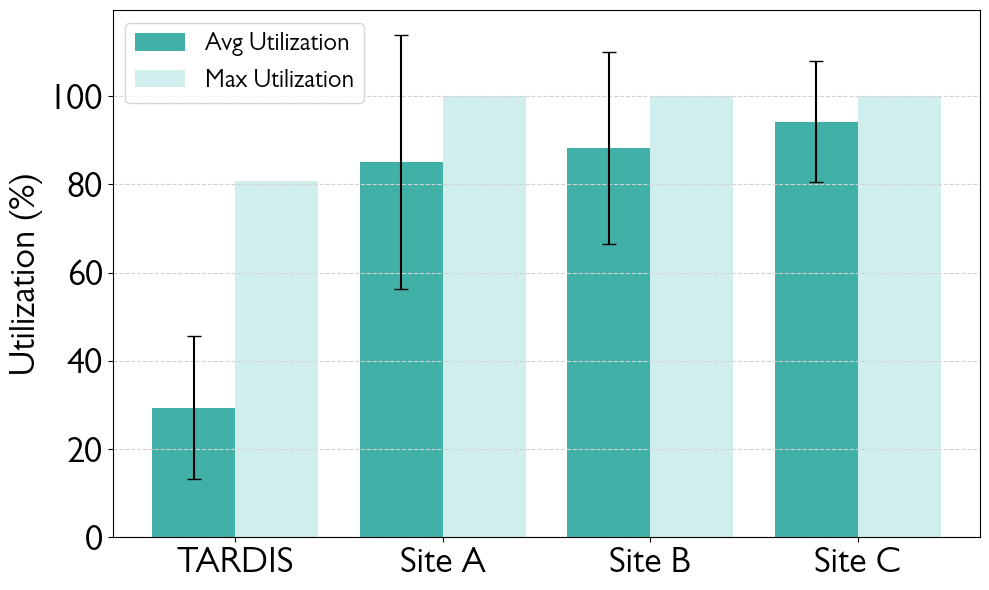

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data
schedulers = ["multi_zone", "single_us_east", "single_us_west", "single_us_south"]
formatted_schedulers = ["TARDIS", "Site A", "Site B", "Site C"]  # Formatted labels
avg_utilization = [29.37, 85.09, 88.3, 94.23]
max_utilization = [80.86, 100, 100, 100]
std_dev = [16.23, 28.76, 21.71, 13.78]

# Set font and overall styling
plt.rcParams['font.family'] = 'Gill Sans'

# Define figure size and custom colors
figsize = (10, 6)
custom_palette = ["#2ec4b6", "#cbf3f0"]  # Teal and Light Teal

# Create a DataFrame for visualization
df_viz = pd.DataFrame({
    "Scheduler": schedulers * 2,
    "Utilization Type": ["Avg Utilization"] * 4 + ["Max Utilization"] * 4,
    "Utilization (%)": avg_utilization + max_utilization,
    "Std Dev": std_dev + [0] * 4  # Error bars only for Avg Utilization
})

# Plot grouped bar chart with custom colors
plt.figure(figsize=figsize)
ax = sns.barplot(
    x="Scheduler", 
    y="Utilization (%)", 
    hue="Utilization Type", 
    data=df_viz, 
    palette=custom_palette, 
    capsize=0.1,
    errwidth=1.5
)

# Modify x-tick labels
ax.set_xticks(range(len(formatted_schedulers)))
ax.set_xticklabels(formatted_schedulers, fontsize=26)

# Add error bars for avg utilization
for i, scheduler in enumerate(schedulers):
    ax.errorbar(i - 0.2, avg_utilization[i], yerr=std_dev[i], fmt='none', color='black', capsize=5)

# Labels and Formatting
plt.yticks(fontsize=26)
plt.xlabel("", fontsize=26)
plt.ylabel("Utilization (%)", fontsize=26)
plt.grid(axis="y", linestyle="dashed", color="lightgrey")
plt.legend(fontsize=18, title_fontsize=26, loc="upper left")

# Show plot
plt.tight_layout()
plt.savefig("multi_avg_utilization.pdf", bbox_inches='tight')

plt.show()


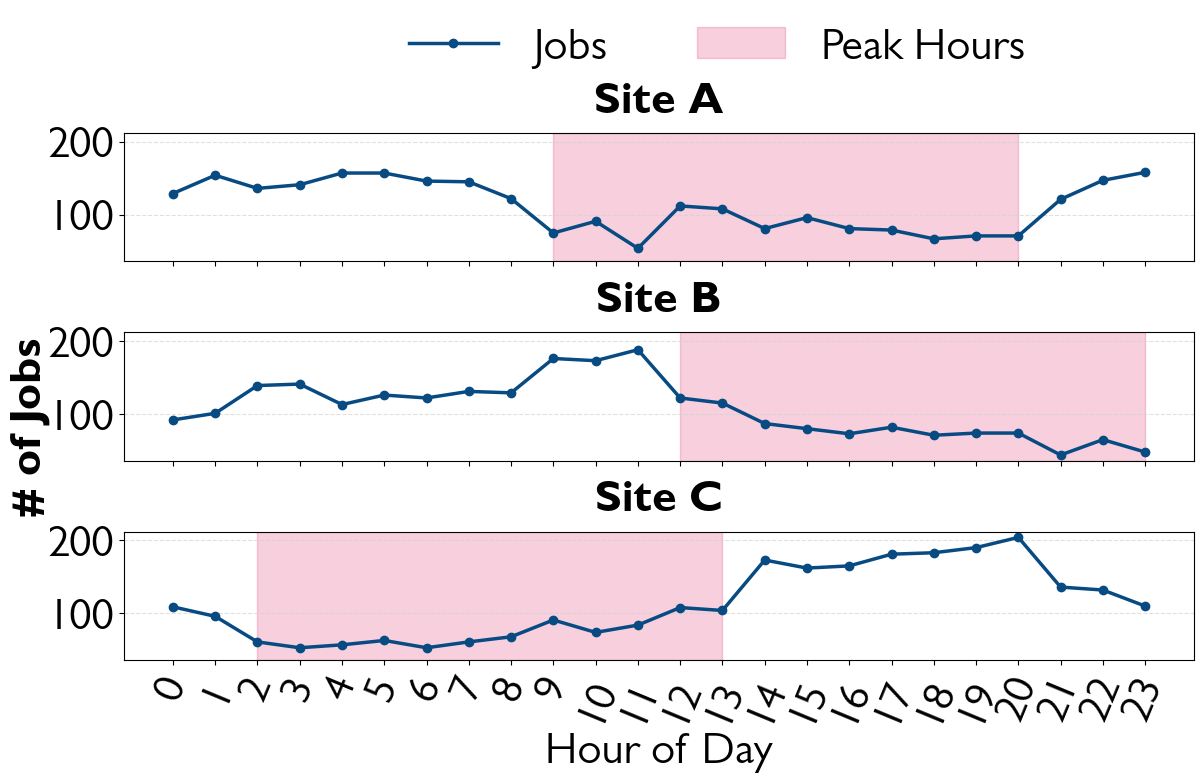

In [17]:
# Re-import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Set font and overall styling
plt.rcParams['font.family'] = 'Gill Sans'

# Sample Data Preparation
# Sample Data Preparation
data = {
    'Site A': [129, 154, 136, 141, 157, 157, 146, 145, 122, 75, 91, 54, 112, 108, 81, 96, 81, 79, 67, 71, 71, 121, 147, 158],
    'Site B': [92, 101, 139, 141, 113, 126, 122, 131, 129, 176, 173, 188, 122, 115, 87, 80, 73, 82, 71, 74, 74, 44, 65, 48],
    'Site C': [109, 96, 61, 53, 57, 63, 53, 61, 68, 91, 74, 84, 108, 104, 173, 162, 165, 181, 183, 190, 204, 136, 132, 110]
}

regions = ['Site A', 'Site B', 'Site C']
peak_hours = {
    'Site A': list(range(9, 21)),  # 09:00–20:00
    'Site B': list(range(12, 24)), # 12:00–23:00
    'Site C': list(range(2, 14))   # 02:00–13:00
}

# Define color scheme
line_color = "#084b83"  # Deep blue for lines
shade_color = "#d81159"  # Red for peak hour shading
grid_color = "lightgrey"  # Light grey for grid lines

fig, axes = plt.subplots(3, 1, figsize=(12, 8), sharex=True, sharey=True)
for ax, region in zip(axes, regions):
    hours = np.arange(24)
    jobs = data[region]
    
    # Line plot
    ax.plot(hours, jobs, marker='o', color=line_color, linewidth=2.5, label='Jobs')

    # Shade peak hours
    ax.axvspan(min(peak_hours[region]), max(peak_hours[region]), 
               color=shade_color, alpha=0.2, label='Peak Hours')

    # Formatting
    ax.set_title(region, fontsize=32, fontweight='bold', pad=15)  # Added padding to prevent overlap
    ax.tick_params(axis='both', labelsize=32)
    ax.grid(axis='y', linestyle='--', color=grid_color, alpha=0.7)

# X-axis settings
plt.xlabel('Hour of Day', fontsize=32)
plt.xticks(hours, fontsize=32, rotation=67.5)

# Common Y-axis label with better positioning
fig.text(0.001, 0.5, '# of Jobs', va='center', rotation='vertical', fontsize=32, fontweight='bold')

# Create a single-line legend on top without borders
handles, labels = axes[-1].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper left", ncol=2, fontsize=32, frameon=False, bbox_to_anchor=(0.3, 1.05))

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0.02, 0.05, 1, 0.95])  # Adjust margins for legend positioning
plt.savefig("multi_job_dist_peak_offPeak.pdf", bbox_inches='tight')
# Show plot
plt.show()


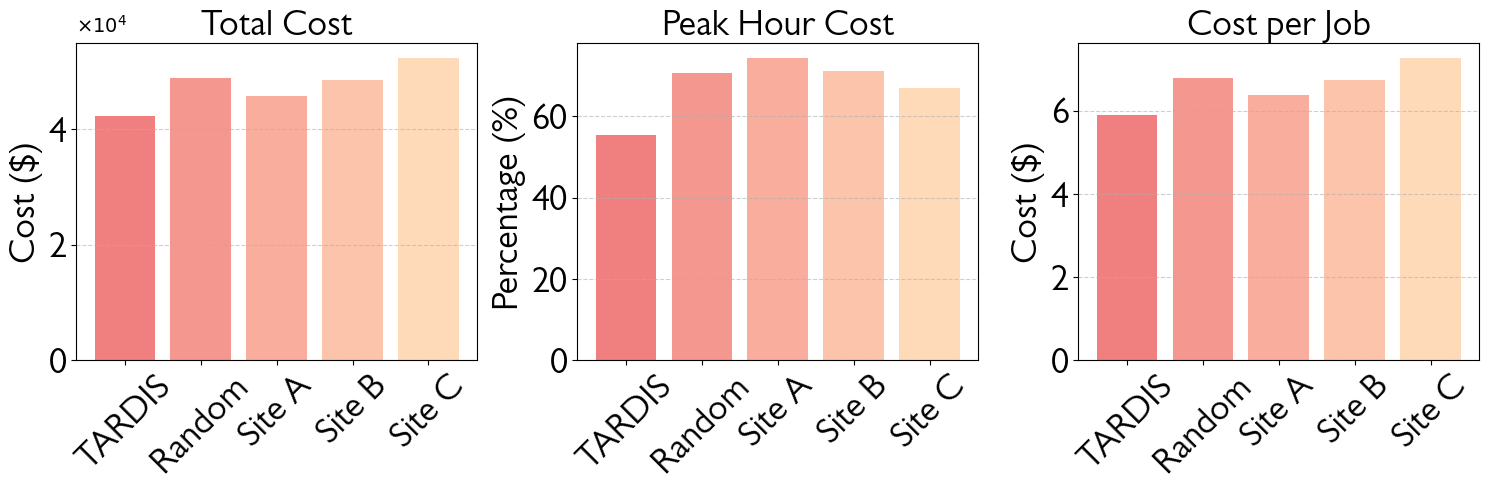

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

# Data
schedulers = ['TARDIS', 'Random', 'Site A', 'Site B', 'Site C']
# Updated dictionary with new data
metrics = {
    'Total Cost ($)': [42373.67, 48901.29, 45836.04, 48546.06, 52251.76],
    'Peak Hour Cost (%)': [55.4, 70.7, 74.2, 71.2, 67.0],
    'Cost per Job ($)': [5.89, 6.79, 6.37, 6.74, 7.26]
}

# Define colors
colors = ['#f08080', '#f4978e', '#f8ad9d', '#fbc4ab', '#ffdab9']

# Create figure with three subplots
# Re-plot with increased tick font size

# Create figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Plot Total Cost
# Function to format the y-axis for Total Cost
def format_func(value, tick_number):
    return f'{int(value / 10000)}'

# Plot Total Cost with formatted y-axis
ax1.bar(schedulers, metrics['Total Cost ($)'], color=colors)
ax1.set_title('Total Cost', fontsize=26)
ax1.set_ylabel('Cost ($)', fontsize=26)
ax1.tick_params(axis='x', rotation=45, labelsize=26)
ax1.tick_params(axis='y', labelsize=26)
ax1.yaxis.set_major_formatter(FuncFormatter(format_func))  # Formatting Y-ticks
ax1.text(0, 1.02, r'$\times 10^4$', transform=ax1.transAxes, fontsize=14, va='bottom', ha='left')
ax1.grid(axis='y', linestyle='--', alpha=0.6)

# Plot Peak Hour Cost Percentage
ax2.bar(schedulers, metrics['Peak Hour Cost (%)'], color=colors)
ax2.set_title('Peak Hour Cost', fontsize=26)
ax2.set_ylabel('Percentage (%)', fontsize=26)
ax2.tick_params(axis='x', rotation=45, labelsize=26)
ax2.tick_params(axis='y', labelsize=26)
ax2.grid(axis='y', linestyle='--', alpha=0.6)

# Plot Cost per Job
ax3.bar(schedulers, metrics['Cost per Job ($)'], color=colors)
ax3.set_title('Cost per Job', fontsize=26)
ax3.set_ylabel('Cost ($)', fontsize=26)
ax3.tick_params(axis='x', rotation=45, labelsize=26)
ax3.tick_params(axis='y', labelsize=26)
ax3.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.savefig("multi_total_cost.pdf", bbox_inches='tight')
plt.show()

